In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train_updated.csv')
test = pd.read_csv('test_updated.csv')

In [3]:
train.head()

,Age,Gender,City,Education_Level,Is_promoted,Attrition,Salary,Total Business Value,Rating,NumberOfDays
0,28,Male,C23,Master,No,1,57387.0,571860.0,2.0,78
1,43,Male,C13,Master,No,1,65603.0,70000.0,1.0,141
2,29,Male,C9,College,No,1,46368.0,40120.0,1.0,58
3,34,Male,C2,College,No,1,70656.0,0.0,1.0,57
4,35,Male,C23,Master,No,1,28116.0,434530.0,2.5,175


In [4]:
train.describe(include='all')

,Age,Gender,City,Education_Level,Is_promoted,Attrition,Salary,Total Business Value,Rating,NumberOfDays
count,1640.000000,1640,1640,1640,1640,1640.000000,1640.000000,1.640000e+03,1640.000000,1640.000000
unique,NaN,2,29,3,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,C20,Master,No,NaN,NaN,NaN,NaN,NaN
freq,NaN,964,111,556,1416,NaN,NaN,NaN,NaN,NaN
mean,32.918902,NaN,NaN,NaN,NaN,0.985366,55542.965124,2.099774e+05,1.380970,357.758537
std,5.930872,NaN,NaN,NaN,NaN,0.120120,27065.784476,3.226033e+05,0.568449,457.406857
min,21.000000,NaN,NaN,NaN,NaN,0.000000,10747.000000,-1.979329e+05,1.000000,0.000000
25%,29.000000,NaN,NaN,NaN,NaN,1.000000,36117.500000,0.000000e+00,1.000000,98.000000
50%,32.000000,NaN,NaN,NaN,NaN,1.000000,51663.500000,1.006478e+05,1.000000,175.500000
75%,37.000000,NaN,NaN,NaN,NaN,1.000000,70169.500000,3.056373e+05,1.666667,386.500000


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
train.dtypes

Age                       int64
Gender                   object
City                     object
Education_Level          object
Is_promoted              object
Attrition                 int64
Salary                  float64
Total Business Value    float64
Rating                  float64
NumberOfDays              int64
dtype: object

In [8]:
Y=train[['Attrition']]
X=train.drop(['Attrition'],axis=1)

In [9]:
Y.mean()

Attrition    0.985366
dtype: float64

In [10]:
#X.RatingChange.value_counts()

In [11]:
X['Gender']= X['Gender'].map({'Male':0 , 'Female':1})
X['Education_Level']= X['Education_Level'].map({'College':0 ,'Bachelor':1, 'Master':2})
X['Is_promoted']= X['Is_promoted'].map({'No':0 , 'Yes':1})
#X['RatingChange']= X['RatingChange'].map({'Decreased':-1 , 'Same':0 , 'Increased':1})



In [12]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
X['City']= label_encoder.fit_transform(X['City'])


In [13]:
X

,Age,Gender,City,Education_Level,Is_promoted,Salary,Total Business Value,Rating,NumberOfDays
0,28,0,15,2,0,57387.0,571860.000000,2.000000,78
1,43,0,4,2,0,65603.0,70000.000000,1.000000,141
2,29,0,28,0,0,46368.0,40120.000000,1.000000,58
3,34,0,11,0,0,70656.0,0.000000,1.000000,57
4,35,0,15,2,0,28116.0,434530.000000,2.500000,175
...,...,...,...,...,...,...,...,...,...
1635,28,0,18,0,0,95133.0,0.000000,1.000000,19
1636,26,0,10,1,0,29582.0,0.000000,1.000000,92
1637,34,1,28,0,0,12105.0,0.000000,1.000000,61
1638,44,0,10,0,0,35370.0,312787.777778,1.666667,419


In [14]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [15]:
X

,Age,Gender,City,Education_Level,Is_promoted,Salary,Total Business Value,Rating,NumberOfDays
0,28,0,15,2,0,57387.000000,571860.000000,2.000000,78
1,43,0,4,2,0,65603.000000,70000.000000,1.000000,141
2,29,0,28,0,0,46368.000000,40120.000000,1.000000,58
3,34,0,11,0,0,70656.000000,0.000000,1.000000,57
4,35,0,15,2,0,28116.000000,434530.000000,2.500000,175
...,...,...,...,...,...,...,...,...,...
3227,30,0,17,0,0,29559.002235,48414.905680,1.000000,154
3228,27,0,4,0,0,42389.263884,0.000000,1.000000,35
3229,34,0,22,0,0,27679.058951,0.000000,1.000000,29
3230,35,0,24,1,0,57918.902271,0.000000,1.000000,100


In [16]:
Y.mean()

Attrition    0.5
dtype: float64

In [17]:
char = X[['Gender','City','Education_Level','Is_promoted']]

In [18]:
num=X[['Age','Salary','Total Business Value','Rating','NumberOfDays']]
#char=X.select_dtypes(include="object")

In [19]:
num

,Age,Salary,Total Business Value,Rating,NumberOfDays
0,28,57387.000000,571860.000000,2.000000,78
1,43,65603.000000,70000.000000,1.000000,141
2,29,46368.000000,40120.000000,1.000000,58
3,34,70656.000000,0.000000,1.000000,57
4,35,28116.000000,434530.000000,2.500000,175
...,...,...,...,...,...
3227,30,29559.002235,48414.905680,1.000000,154
3228,27,42389.263884,0.000000,1.000000,35
3229,34,27679.058951,0.000000,1.000000,29
3230,35,57918.902271,0.000000,1.000000,100


In [20]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=5,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.tail()

,Age_Rank,Salary_Rank,Total Business Value_Rank,Rating_Rank,NumberOfDays_Rank
3227,1.0,0.0,1.0,0.0,2.0
3228,0.0,1.0,1.0,0.0,0.0
3229,3.0,0.0,1.0,0.0,0.0
3230,3.0,2.0,1.0,0.0,1.0
3231,4.0,1.0,2.0,1.0,4.0


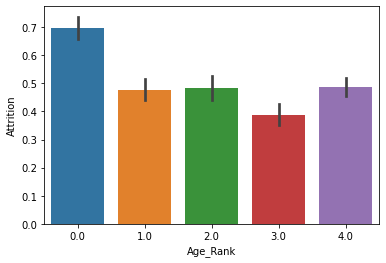

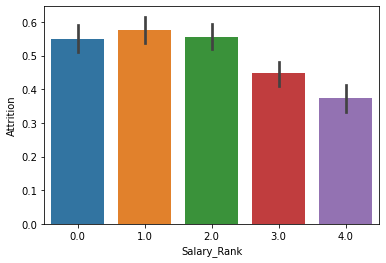

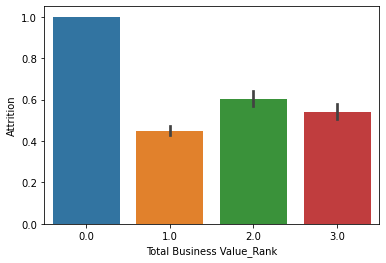

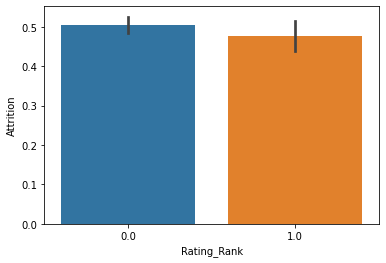

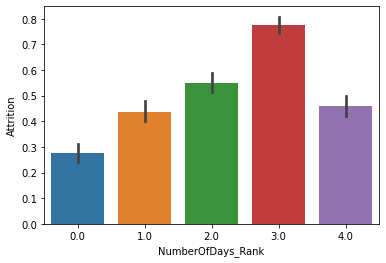

In [21]:
from numpy import mean

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')


for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=Y.mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Attrition",data=X_bin_combined, estimator=mean )
plt.show()

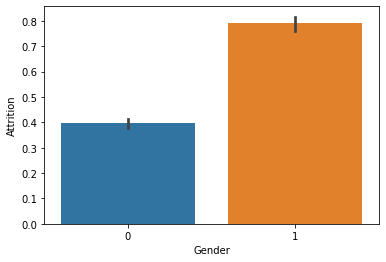

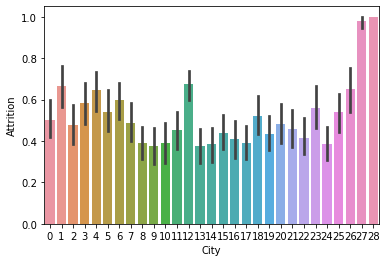

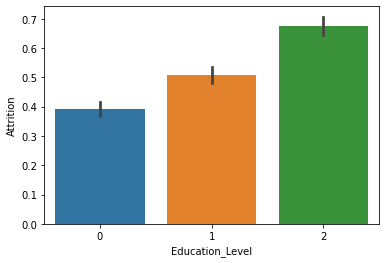

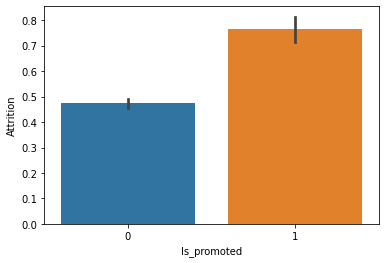

In [22]:
X_char_merged = pd.concat([Y,char],axis=1,join='inner')


for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="Attrition",data=X_char_merged, estimator=mean )
plt.show()

In [23]:
char

,Gender,City,Education_Level,Is_promoted
0,0,15,2,0
1,0,4,2,0
2,0,28,0,0
3,0,11,0,0
4,0,15,2,0
...,...,...,...,...
3227,0,17,0,0
3228,0,4,0,0
3229,0,22,0,0
3230,0,24,1,0


In [24]:
X_all=pd.concat([num_binned,char],axis=1,join="inner")

In [25]:
X_all

,Age_Rank,Salary_Rank,Total Business Value_Rank,Rating_Rank,NumberOfDays_Rank,Gender,City,Education_Level,Is_promoted
0,0.0,2.0,3.0,1.0,1.0,0,15,2,0
1,4.0,3.0,1.0,0.0,2.0,0,4,2,0
2,1.0,1.0,1.0,0.0,0.0,0,28,0,0
3,3.0,3.0,1.0,0.0,0.0,0,11,0,0
4,3.0,0.0,3.0,1.0,2.0,0,15,2,0
...,...,...,...,...,...,...,...,...,...
3227,1.0,0.0,1.0,0.0,2.0,0,17,0,0
3228,0.0,1.0,1.0,0.0,0.0,0,4,0,0
3229,3.0,0.0,1.0,0.0,0.0,0,22,0,0
3230,3.0,2.0,1.0,0.0,1.0,0,24,1,0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [27]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Attrition Rate in Training Data",y_train.mean())
print("Attrition Rate in Testing Data",y_test.mean())

Shape of Training Data (2262, 9)
Shape of Testing Data (970, 9)
Attrition Rate in Training Data Attrition    0.493369
dtype: float64
Attrition Rate in Testing Data Attrition    0.515464
dtype: float64


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

In [29]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,120,180,200,250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [30]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=20)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=20)

In [32]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=50,
                           random_state=20)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

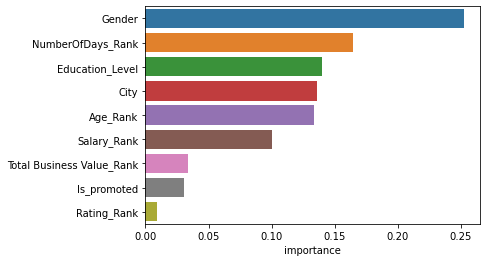

In [34]:
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)


ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

In [35]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_lr = logreg.predict(X_test)

In [36]:
from sklearn import metrics

print("f1_score Dtree",metrics.f1_score(y_test,y_pred_tree))
print("f1_score RF",metrics.f1_score(y_test,y_pred_rf))
print("f1_score GB",metrics.f1_score(y_test,y_pred_gbm))
print("f1_score LR",metrics.f1_score(y_test,y_pred_lr))

f1_score Dtree 0.8367567567567568
f1_score RF 0.825503355704698
f1_score GB 0.9377593360995852
f1_score LR 0.751619870410367


In [37]:
test

,Age,Gender,City,Education_Level,Is_promoted,Salary,Total Business Value,Rating,NumberOfDays
0,32,Female,C20,Master,Yes,97722.0,1.144092e+06,2.125,2370
1,37,Male,C28,College,Yes,56174.0,8.277621e+05,2.750,2363
2,37,Male,C13,College,Yes,96750.0,2.099270e+06,2.750,2349
3,39,Female,C8,College,Yes,88813.0,7.139183e+05,1.500,2335
4,30,Male,C5,Master,Yes,188418.0,2.417687e+06,2.625,2300
...,...,...,...,...,...,...,...,...,...
736,38,Male,C29,College,Yes,116006.0,2.487352e+06,2.875,2589
737,38,Male,C25,College,Yes,133489.0,1.516587e+06,2.625,2582
738,35,Male,C10,Bachelor,Yes,65389.0,1.263282e+06,2.125,2433
739,46,Female,C9,Bachelor,Yes,105513.0,1.201782e+06,2.125,2409


In [38]:
test['Gender']= test['Gender'].map({'Male':0 , 'Female':1})
test['Education_Level']= test['Education_Level'].map({'College':0 ,'Bachelor':1, 'Master':2})
test['Is_promoted']= test['Is_promoted'].map({'No':0 , 'Yes':1})
#test['RatingChange']= test['RatingChange'].map({'Decreased':-1 , 'Same':0 , 'Increased':1})

label_encoder = preprocessing.LabelEncoder()
test['City']= label_encoder.fit_transform(test['City'])




In [39]:
num=test[['Age','Salary','Total Business Value','Rating','NumberOfDays']]

from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.tail()

,Age_Rank,Salary_Rank,Total Business Value_Rank,Rating_Rank,NumberOfDays_Rank
736,8.0,9.0,7.0,5.0,9.0
737,8.0,9.0,7.0,4.0,9.0
738,6.0,5.0,6.0,2.0,9.0
739,9.0,8.0,6.0,2.0,9.0
740,5.0,8.0,5.0,3.0,9.0


In [40]:
test_all=pd.concat([test,num_binned],axis=1,join='inner')
test_all.drop(['Age','Salary','Total Business Value','Rating','NumberOfDays'],axis=1,inplace=True)


In [41]:
test_all

,Gender,City,Education_Level,Is_promoted,Age_Rank,Salary_Rank,Total Business Value_Rank,Rating_Rank,NumberOfDays_Rank
0,1,12,2,1,4.0,8.0,6.0,2.0,9.0
1,0,20,0,1,7.0,3.0,5.0,5.0,9.0
2,0,4,0,1,7.0,8.0,7.0,5.0,9.0
3,1,27,0,1,8.0,7.0,5.0,0.0,9.0
4,0,24,2,1,3.0,9.0,7.0,4.0,9.0
...,...,...,...,...,...,...,...,...,...
736,0,21,0,1,8.0,9.0,7.0,5.0,9.0
737,0,17,0,1,8.0,9.0,7.0,4.0,9.0
738,0,1,1,1,6.0,5.0,6.0,2.0,9.0
739,1,28,1,1,9.0,8.0,6.0,2.0,9.0


In [42]:
y_pred_test_tree=dtree.predict(test_all)
y_pred_test_rf=rf.predict(test_all)
y_pred_test_gbm=gbm.predict(test_all)
y_pred_test_lr=logreg.predict(test_all)

In [43]:
sub = pd.read_csv('sample_submission.csv')

sub['Target'] = y_pred_test_tree

sub.to_csv('predictions_dt.csv',index=False)

In [44]:
sub = pd.read_csv('sample_submission.csv')

sub['Target'] = y_pred_test_rf

sub.to_csv('predictions_rf.csv',index=False)

In [47]:
sub = pd.read_csv('sample_submission.csv')

sub['Target'] = y_pred_test_gbm

sub.to_csv('predictions_gb.csv',index=False)

In [54]:
sub = pd.read_csv('sample_submission.csv')

sub['Target'] = y_pred_test_lr

sub.to_csv('predictions_lr.csv',index=False)

In [55]:
dt = pd.read_csv('predictions_dt.csv')
rf = pd.read_csv('predictions_rf.csv')
gb = pd.read_csv('predictions_gb.csv')
lr = pd.read_csv('predictions_lr.csv')

In [56]:
dt.Target.mean()

0.8340080971659919

In [57]:
rf.Target.mean()

0.9770580296896086

In [58]:
gb.Target.mean()

0.9730094466936572

In [59]:
lr.Target.mean()

0.8987854251012146